# BigWig Correlations

1) From the bigwig files generates in our Ihec Pipeline tests we performed a correlation (pearson) among them
2) To run the correlations we used the bigWigCorrelator on mammouth and we get the output
3) These outputs will be used here to generate the correlation matrix


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# H3K4me1 test samples

In [5]:
pd.set_option('display.max_rows', 20)
h3k4me1_df = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/h3k4me1_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [6]:
h3k4me1_df

,File1,File2,correlation
0,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,0.964376
1,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938506_1.nodup_x_ctl_for_rep2.pval.signal_...,0.448024
2,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938506_1.nodup_x_ctl_for_rep2.pval.signal_...,0.407401
3,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,0.652358
4,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,0.621528
...,...,...,...
23,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.723316
24,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.689804
25,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.696294
26,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.712867


In [7]:
# Function to replace part of strings 

def replace_substring_bigwig(df, regex:[()], columns:[]):
   
    df_local = df.copy()
#     h3k4me1_df['File1'] = h3k4me1_df['File1'].str.replace(r'^SRR\d+\w+\.\w{15}', 'h3k4me1').str.replace(r'\.bigwig','')
    
    for col in columns:
        for i in regex:
             df_local[col]= df_local[col].str.replace(i[0],i[1]) 
    
    
    return df_local




In [8]:
#Creating a copy of h3k4me1_df with optimized strings

h3k4me1_df1 = replace_substring_bigwig(h3k4me1_df, [(r'.signal', ''), (r'^SRR\d+\w+\.\w{15}', 'h3k4me1'), (r'.bigwig', '')], columns=['File1', 'File2'])
h3k4me1_df1

,File1,File2,correlation
0,h3k4me1_rep1.pval_1ctrl,h3k4me1_rep1.pval_4ctrl,0.964376
1,h3k4me1_rep1.pval_1ctrl,h3k4me1_rep2.pval_1ctrl,0.448024
2,h3k4me1_rep1.pval_1ctrl,h3k4me1_rep2.pval_4ctrl,0.407401
3,h3k4me1_rep1.pval_1ctrl,h3k4me1_rep3.pval_1ctrl,0.652358
4,h3k4me1_rep1.pval_1ctrl,h3k4me1_rep3.pval_4ctrl,0.621528
...,...,...,...
23,h3k4me1_rep3.pval_1ctrl,h3k4me1_rep4.pval_1ctrl,0.723316
24,h3k4me1_rep3.pval_1ctrl,h3k4me1_rep4.pval_4ctrl,0.689804
25,h3k4me1_rep3.pval_4ctrl,h3k4me1_rep4.pval_1ctrl,0.696294
26,h3k4me1_rep3.pval_4ctrl,h3k4me1_rep4.pval_4ctrl,0.712867


In [109]:
#pivoted table h3k4me1


result = h3k4me1_df1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table

result_trans = result.T



In [112]:
#H3K4me1 HEATMAP

#Filling the absent values related to the corr with the same samples

#put the index and columns strings into a list
list_index = result_trans.index.tolist()
list_columns = result_trans.columns.tolist()


#looping these list to match our condition and repla
for i in list_index:
    for c in list_columns:
        if i == c:
#             print(i,c
            result_trans.loc[i,c]=1




In [125]:
#Heatmap code

%matplotlib

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result_trans, annot=True, fmt=".2g", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':16})

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values


plt.title("H3K4me1", fontsize =20)
plt.xlabel('Replicates', fontsize = 15)
plt.ylabel('Replicates', fontsize = 15)




plt.show()

Using matplotlib backend: MacOSX


# Macrophage test

In [ ]:
#running on mamouth

In [10]:
#loading macrophage output bigwigcorrelate

macrophage_df = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/macrophage_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [11]:
macrophage_df

,File1,File2,correlation
0,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,0.994736
1,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842726_1.merged.nodup_x_ctl_for_rep2.pval....,0.810541
2,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842726_1.merged.nodup_x_ctl_for_rep2.pval....,0.806681
3,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842729_1.merged.nodup_x_ctl_for_rep3.pval....,0.780431
4,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842729_1.merged.nodup_x_ctl_for_rep3.pval....,0.776120
...,...,...,...
40,SRR1842732_1.merged.nodup_x_ctl_for_rep4.pval....,SRR333637_1.merged.nodup_x_ctl_for_rep5.pval.s...,0.669112
41,SRR1842732_1.merged.nodup_x_ctl_for_rep4.pval....,SRR333637_1.merged.nodup_x_ctl_for_rep5.pval.s...,0.663132
42,SRR1842732_1.merged.nodup_x_ctl_for_rep4.pval....,SRR333637_1.merged.nodup_x_ctl_for_rep5.pval.s...,0.666463
43,SRR1842732_1.merged.nodup_x_ctl_for_rep4.pval....,SRR333637_1.merged.nodup_x_ctl_for_rep5.pval.s...,0.671882


In [12]:
#Organizing strings 
#here the regex is different because we have the name merged in our string


macrophage_df1 = replace_substring_bigwig(macrophage_df, [(r'.signal', ''), (r'^SRR\d+\w+\.\w+\.\w{15}', 'macrophage'), (r'.bigwig', '')], columns=['File1', 'File2'])
macrophage_df1

,File1,File2,correlation
0,macrophage_rep1.pval_1ctrl,macrophage_rep1.pval_4ctrl,0.994736
1,macrophage_rep1.pval_1ctrl,macrophage_rep2.pval_1ctrl,0.810541
2,macrophage_rep1.pval_1ctrl,macrophage_rep2.pval_4ctrl,0.806681
3,macrophage_rep1.pval_1ctrl,macrophage_rep3.pval_1ctrl,0.780431
4,macrophage_rep1.pval_1ctrl,macrophage_rep3.pval_4ctrl,0.776120
...,...,...,...
40,macrophage_rep4.pval_1ctrl,macrophage_rep5.pval_1ctrl,0.669112
41,macrophage_rep4.pval_1ctrl,macrophage_rep5.pval_4ctrl,0.663132
42,macrophage_rep4.pval_4ctrl,macrophage_rep5.pval_1ctrl,0.666463
43,macrophage_rep4.pval_4ctrl,macrophage_rep5.pval_4ctrl,0.671882


In [115]:
#Macrophage df pivoted and transposed

result_macro = macrophage_df1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table

result_macro_trans = result_macro.T

In [118]:
#Macrophage HEATMAP

#Filling the absent values related to the corr with the same samples

#put the index and columns strings into a list
list_index_1 = result_macro_trans.index.tolist()
list_columns_1 = result_macro_trans.columns.tolist()


#looping these list to match our condition and repla
for i in list_index_1:
    for c in list_columns_1:
        if i == c:
#             print(i,c
            result_macro_trans.loc[i,c]=1




In [121]:
#heatmap macrophage 

# %matplotlib

# result_1 = macrophage_df1.pivot_table(index='File1', columns='File2', values='correlation')
#mask = np.zeros_like(result)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result_macro_trans, annot=True, fmt=".2g", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':16})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("Macrophage", fontsize =20)
plt.xlabel('Replicates', fontsize = 15)
plt.ylabel('Replicates', fontsize = 15)
plt.show() # ta-da!



# Correlation among all samples

In [23]:
#loading all_samples output bigwigcorrelate

all_df = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/all_samples_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [24]:
all_df

,File1,File2,correlation
0,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,0.994736
1,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842726_1.merged.nodup_x_ctl_for_rep2.pval....,0.810541
2,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842726_1.merged.nodup_x_ctl_for_rep2.pval....,0.806681
3,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842729_1.merged.nodup_x_ctl_for_rep3.pval....,0.780431
4,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,SRR1842729_1.merged.nodup_x_ctl_for_rep3.pval....,0.776120
...,...,...,...
148,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.723316
149,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.689804
150,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.696294
151,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.712867


In [130]:
#Organizing strings 
#here we need to specify two regex (one to h3k4me1 and macrophage)


all_df1 = replace_substring_bigwig(all_df, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'macrophage'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])
all_df1


,File1,File2,correlation
0,macrophage_rep1.pval_1ctrl,macrophage_rep1.pval_4ctrl,0.994736
1,macrophage_rep1.pval_1ctrl,macrophage_rep2.pval_1ctrl,0.810541
2,macrophage_rep1.pval_1ctrl,macrophage_rep2.pval_4ctrl,0.806681
3,macrophage_rep1.pval_1ctrl,macrophage_rep3.pval_1ctrl,0.780431
4,macrophage_rep1.pval_1ctrl,macrophage_rep3.pval_4ctrl,0.776120
...,...,...,...
148,h3k4me3_rep3.pval_1ctrl,h3k4me3_rep4.pval_1ctrl,0.723316
149,h3k4me3_rep3.pval_1ctrl,h3k4me3_rep4.pval_4ctrl,0.689804
150,h3k4me3_rep3.pval_4ctrl,h3k4me3_rep4.pval_1ctrl,0.696294
151,h3k4me3_rep3.pval_4ctrl,h3k4me3_rep4.pval_4ctrl,0.712867


In [131]:
#All df pivoted and transposed

result_all = all_df1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table

result_all_trans = result_all.T

In [132]:
#Macrophage HEATMAP

#Filling the absent values related to the corr with the same samples

#put the index and columns strings into a list
list_index_2 = result_all_trans.index.tolist()
list_columns_2 = result_all_trans.columns.tolist()


#looping these list to match our condition and repla
for i in list_index_2:
    for c in list_columns_2:
        if i == c:
#             print(i,c
            result_all_trans.loc[i,c]=1




In [133]:
#%matplotlib


f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(result_all_trans, annot=True, fmt=".2g", cmap="BuPu" ,square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':8})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("H3K4me3 & Macrophage", fontsize =20)
plt.xlabel('Replicates', fontsize = 15)
plt.ylabel('Replicates', fontsize = 15)
plt.show() # ta-da!


# All BigWigFiles (pval and fc)

#We get all bigwig files (pval and fc.bigwig) from all tests (macrophage and h3k4me3) to check their correlation





In [126]:
#from bigwig correlate results


all_bigwig = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/all_bigwig_pval_fc_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [127]:
all_bigwig

,File1,File2,correlation
0,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,0.986135
1,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,0.958464
2,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,SRR1842723_1.merged.nodup_x_ctl_for_rep1.pval....,0.948496
3,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,SRR1842726_1.merged.nodup_x_ctl_for_rep2.fc.si...,0.846012
4,SRR1842723_1.merged.nodup_x_ctl_for_rep1.fc.si...,SRR1842726_1.merged.nodup_x_ctl_for_rep2.fc.si...,0.834517
...,...,...,...
625,SRR9938508_1.nodup_x_ctl_for_rep4.fc.signal_1c...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.767102
626,SRR9938508_1.nodup_x_ctl_for_rep4.fc.signal_1c...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.735578
627,SRR9938508_1.nodup_x_ctl_for_rep4.fc.signal_4c...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.732230
628,SRR9938508_1.nodup_x_ctl_for_rep4.fc.signal_4c...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.755294


In [141]:
#replacing string to macrophage samples

all_bigwig1 = replace_substring_bigwig(all_bigwig, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])
all_bigwig1



,File1,File2,correlation
0,mcrph_rep1.fc_1ctrl,mcrph_rep1.fc_4ctrl,0.986135
1,mcrph_rep1.fc_1ctrl,mcrph_rep1.pval_1ctrl,0.958464
2,mcrph_rep1.fc_1ctrl,mcrph_rep1.pval_4ctrl,0.948496
3,mcrph_rep1.fc_1ctrl,mcrph_rep2.fc_1ctrl,0.846012
4,mcrph_rep1.fc_1ctrl,mcrph_rep2.fc_4ctrl,0.834517
...,...,...,...
625,h3k4me3_rep4.fc_1ctrl,h3k4me3_rep4.pval_1ctrl,0.767102
626,h3k4me3_rep4.fc_1ctrl,h3k4me3_rep4.pval_4ctrl,0.735578
627,h3k4me3_rep4.fc_4ctrl,h3k4me3_rep4.pval_1ctrl,0.732230
628,h3k4me3_rep4.fc_4ctrl,h3k4me3_rep4.pval_4ctrl,0.755294


In [142]:
#pivoted and transposed

result_all_bigwig = all_bigwig1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table

result_all_big_wig_trans = result_all_bigwig.T

In [194]:
#Checking first the correlation matrix, and after, create a cluster

#%matplotlib


f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_all_big_wig_trans, annot=True, fmt=".2g", cmap="BuPu" ,square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':4})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("All bigwig pval and fc", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!


# Cluster 
We performed this cluster to see which samples will be grouped (pval and fc.bigwig files from macrophage and h3k4me3 samples


In [159]:
#First - fill the NAN values with zero
#The table is in the correct format

result_all_big_wig_trans2 = result_all_big_wig_trans.fillna(0)


In [160]:
result_all_big_wig_trans2 

File1,h3k4me3_rep1.fc_1ctrl,h3k4me3_rep1.fc_4ctrl,h3k4me3_rep1.pval_1ctrl,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep2.fc_1ctrl,h3k4me3_rep2.fc_4ctrl,h3k4me3_rep2.pval_1ctrl,h3k4me3_rep2.pval_4ctrl,h3k4me3_rep3.fc_1ctrl,h3k4me3_rep3.fc_4ctrl,...,mcrph_rep3.pval_1ctrl,mcrph_rep3.pval_4ctrl,mcrph_rep4.fc_1ctrl,mcrph_rep4.fc_4ctrl,mcrph_rep4.pval_1ctrl,mcrph_rep4.pval_4ctrl,mcrph_rep5.fc_1ctrl,mcrph_rep5.fc_4ctrl,mcrph_rep5.pval_1ctrl,mcrph_rep5.pval_4ctrl
File2,,,,,,,,,,,,,,,,,,,,,
h3k4me3_rep1.fc_1ctrl,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059288,0.060172,0.088164,0.089680,0.061100,0.062140,0.069876,0.070959,0.051002,0.052124
h3k4me3_rep1.fc_4ctrl,0.964052,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059567,0.060397,0.089211,0.090635,0.061498,0.062485,0.070171,0.071168,0.050858,0.051936
h3k4me3_rep1.pval_1ctrl,0.768216,0.730373,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038241,0.039023,0.055294,0.056618,0.043634,0.044577,0.040040,0.040958,0.030009,0.030658
h3k4me3_rep1.pval_4ctrl,0.739553,0.760083,0.964376,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.041867,0.042651,0.061791,0.063121,0.048037,0.048997,0.043806,0.044700,0.032223,0.032884
h3k4me3_rep2.fc_1ctrl,0.272795,0.245822,0.287970,0.260088,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059180,0.060494,0.090704,0.093003,0.060154,0.061589,0.076392,0.078033,0.056758,0.058490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mcrph_rep4.pval_4ctrl,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.730077,0.736957,0.922958,0.936124,0.989860,0.000000,0.000000,0.000000,0.000000,0.000000
mcrph_rep5.fc_1ctrl,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698377,0.692138,0.713281,0.704979,0.683786,0.677501,0.000000,0.000000,0.000000,0.000000
mcrph_rep5.fc_4ctrl,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.692093,0.701518,0.702275,0.715235,0.675948,0.685729,0.978866,0.000000,0.000000,0.000000


In [193]:
#cluster all 
import matplotlib.colorbar as mcbar
                             

sns.clustermap(result_all_big_wig_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("All_BigWig_All_Tests", fontsize =20)

# plt.xlabel('Replicates', fontsize = 12)
# plt.ylabel('Replicates', fontsize = 12)


Text(0.5, 1, 'All_BigWig_All_Tests')

# Macrophage test with h3k4me3-controls x macrophage-owner controls

In [195]:
#loaging output generated by bigwigcorrelator among macrophage-h3k4me3-ctrls and macrophage-controls

mcrp_h3k4me3_ctrls = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/mcrp-4ctrl-mcrp-h3k4me3-4ctrl_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [197]:
#replacing string to macrophage samples

mcrp_h3k4me3_ctrls1 = replace_substring_bigwig(mcrp_h3k4me3_ctrls, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])
mcrp_h3k4me3_ctrls1

,File1,File2,correlation
0,mcrph_rep1.pval_4ctrl,mcrph_rep1.pval_hkme-4ctl,0.909746
1,mcrph_rep1.pval_4ctrl,mcrph_rep2.pval_4ctrl,0.811153
2,mcrph_rep1.pval_4ctrl,mcrph_rep2.pval_hkme-4ctl,0.715346
3,mcrph_rep1.pval_4ctrl,mcrph_rep3.pval_4ctrl,0.780921
4,mcrph_rep1.pval_4ctrl,mcrph_rep3.pval_hkme-4ctl,0.677779
...,...,...,...
40,mcrph_rep4.pval_4ctrl,mcrph_rep5.pval_4ctrl,0.671882
41,mcrph_rep4.pval_4ctrl,mcrph_rep5.pval_hkme-4ctl,0.601292
42,mcrph_rep4.pval_hkme-4ctl,mcrph_rep5.pval_4ctrl,0.607707
43,mcrph_rep4.pval_hkme-4ctl,mcrph_rep5.pval_hkme-4ctl,0.670502


In [198]:
#pivoted and transposed

result_mcrp_h3k4me3_ctrls = mcrp_h3k4me3_ctrls1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table

result_mcrp_h3k4me3_ctrls_trans = result_mcrp_h3k4me3_ctrls.T

In [199]:
result_mcrp_h3k4me3_ctrls_trans

File1,mcrph_rep1.pval_4ctrl,mcrph_rep1.pval_hkme-4ctl,mcrph_rep2.pval_4ctrl,mcrph_rep2.pval_hkme-4ctl,mcrph_rep3.pval_4ctrl,mcrph_rep3.pval_hkme-4ctl,mcrph_rep4.pval_4ctrl,mcrph_rep4.pval_hkme-4ctl,mcrph_rep5.pval_4ctrl
File2,,,,,,,,,
mcrph_rep1.pval_hkme-4ctl,0.909746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcrph_rep2.pval_4ctrl,0.811153,0.730501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcrph_rep2.pval_hkme-4ctl,0.715346,0.803303,0.892614,NaN,NaN,NaN,NaN,NaN,NaN
mcrph_rep3.pval_4ctrl,0.780921,0.709216,0.791992,0.704859,NaN,NaN,NaN,NaN,NaN
mcrph_rep3.pval_hkme-4ctl,0.677779,0.771856,0.687101,0.784028,0.889339,NaN,NaN,NaN,NaN
mcrph_rep4.pval_4ctrl,0.803656,0.732278,0.783918,0.702198,0.736957,0.646285,NaN,NaN,NaN
mcrph_rep4.pval_hkme-4ctl,0.691687,0.792788,0.675572,0.778598,0.637321,0.729344,0.885879,NaN,NaN
mcrph_rep5.pval_4ctrl,0.683690,0.643949,0.718196,0.666557,0.681344,0.617048,0.671882,0.607707,NaN
mcrph_rep5.pval_hkme-4ctl,0.604518,0.682120,0.636989,0.718567,0.603567,0.673970,0.601292,0.670502,0.922706


In [202]:
#heatmap

#Checking first the correlation matrix, and after, create a cluster

#%matplotlib


f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_mcrp_h3k4me3_ctrls_trans, annot=True, fmt=".2g", cmap="YlGnBu" ,square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("Macrophage-h3k4me3-ctrl vs macrophage-controls", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!




In [204]:
result_mcrp_h3k4me3_ctrls_trans2 = result_mcrp_h3k4me3_ctrls_trans.fillna(0)

In [205]:
#Clustermap

sns.clustermap(result_mcrp_h3k4me3_ctrls_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("Macrophage_Tests_4ctrls", fontsize =20)




Text(0.5, 1, 'Macrophage_Tests_4ctrls')

# h3k4me3 test with macrophage-controls x h3k4me3-owner controls

In [207]:
#loaging output generated by bigwigcorrelator among macrophage-h3k4me3-ctrls and macrophage-controls

h3k4me3_mcrp_ctrls = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/h3k4me3-4ctrl-mcrp-4ctrl_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])


In [212]:
h3k4me3_mcrp_ctrls

,File1,File2,correlation
0,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,0.510778
1,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938506_1.nodup_x_ctl_for_rep2.pval.signal_...,0.419862
2,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938506_1.nodup_x_ctl_for_rep2.pval.signal_...,0.309461
3,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,0.639649
4,SRR9938505_1.nodup_x_ctl_for_rep1.pval.signal_...,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,0.356319
...,...,...,...
23,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.712867
24,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.355605
25,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.517484
26,SRR9938507_1.nodup_x_ctl_for_rep3.pval.signal_...,SRR9938508_1.nodup_x_ctl_for_rep4.pval.signal_...,0.936981


In [215]:
#replacing strings

h3k4me3_mcrp_ctrls1 = replace_substring_bigwig(h3k4me3_mcrp_ctrls, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [216]:
h3k4me3_mcrp_ctrls1

,File1,File2,correlation
0,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep1.pval_mcrp-4ctrl,0.510778
1,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep2.pval_4ctrl,0.419862
2,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep2.pval_mcrp-4ctrl,0.309461
3,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep3.pval_4ctrl,0.639649
4,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep3.pval_mcrp-4ctrl,0.356319
...,...,...,...
23,h3k4me3_rep3.pval_4ctrl,h3k4me3_rep4.pval_4ctrl,0.712867
24,h3k4me3_rep3.pval_4ctrl,h3k4me3_rep4.pval_mcrp-4ctrl,0.355605
25,h3k4me3_rep3.pval_mcrp-4ctrl,h3k4me3_rep4.pval_4ctrl,0.517484
26,h3k4me3_rep3.pval_mcrp-4ctrl,h3k4me3_rep4.pval_mcrp-4ctrl,0.936981


In [217]:
#pivoted and transposed

result_h3k4me3_mcrp_ctrls = h3k4me3_mcrp_ctrls1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_h3k4me3_mcrp_ctrls_trans = result_h3k4me3_mcrp_ctrls.T

In [218]:
#Heatmap

#Checking first the correlation matrix, and after, create a cluster

#%matplotlib


f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_h3k4me3_mcrp_ctrls_trans, annot=True, fmt=".2g", cmap="Greens", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("h3k4me3-Macrophage-ctrl vs h3k4me3-controls", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!




In [219]:
result_h3k4me3_mcrp_ctrls_trans2 = result_h3k4me3_mcrp_ctrls_trans.fillna(0)

In [220]:
#Clustermap

sns.clustermap(result_h3k4me3_mcrp_ctrls_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("H3k4me3_Tests_4ctrls", fontsize =20)


Text(0.5, 1, 'H3k4me3_Tests_4ctrls')

# Test macrophage - h3k4me3 4 and 1 controls

In [236]:
#load output

mcrp_4_1ctrls_h3k4me3 = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/mcrp-4ctrls-h3k4me3_vs-1ctrl-h3k4me3_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])



In [243]:
#replacing strings

mcrp_4_1ctrls_h3k4me3_1 = replace_substring_bigwig(mcrp_4_1ctrls_h3k4me3, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [244]:
mcrp_4_1ctrls_h3k4me3_1

,File1,File2,correlation
0,mcrph_rep1.pval_1ctrl-h3k4me3,mcrph_rep1.pval_hkme-4ctl,0.987074
1,mcrph_rep1.pval_1ctrl-h3k4me3,mcrph_rep2.pval_1ctrl-h3k4me3,0.802778
2,mcrph_rep1.pval_1ctrl-h3k4me3,mcrph_rep2.pval_hkme-4ctl,0.790787
3,mcrph_rep1.pval_1ctrl-h3k4me3,mcrph_rep3.pval_1ctrl-h3k4me3,0.771033
4,mcrph_rep1.pval_1ctrl-h3k4me3,mcrph_rep3.pval_hkme-4ctl,0.759223
...,...,...,...
40,mcrph_rep4.pval_1ctrl-h3k4me3,mcrph_rep5.pval_1ctrl-h3k4me3,0.663690
41,mcrph_rep4.pval_1ctrl-h3k4me3,mcrph_rep5.pval_hkme-4ctl,0.656127
42,mcrph_rep4.pval_hkme-4ctl,mcrph_rep5.pval_1ctrl-h3k4me3,0.653572
43,mcrph_rep4.pval_hkme-4ctl,mcrph_rep5.pval_hkme-4ctl,0.670502


In [245]:
#pivoted and transposed

result_mcrp_4_1ctrls_h3k4me3 = mcrp_4_1ctrls_h3k4me3_1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_mcrp_4_1ctrls_h3k4me3_trans = result_mcrp_4_1ctrls_h3k4me3.T

In [246]:
#Heatmap

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_mcrp_4_1ctrls_h3k4me3_trans, annot=True, fmt=".2g", cmap="YlOrBr", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("Macrophage-4ctrl-AND-1ctrl-h3k4me3", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!




In [247]:
result_mcrp_4_1ctrls_h3k4me3_trans2 = result_mcrp_4_1ctrls_h3k4me3_trans.fillna(0)

In [248]:
#clustermap

sns.clustermap(result_mcrp_4_1ctrls_h3k4me3_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("Macrophage-4ctrl-AND-1ctrl-h3k4me3", fontsize =20)




Text(0.5, 1, 'Macrophage-4ctrl-AND-1ctrl-h3k4me3')

# Test h3k4me3 - macrophage 4 and 1 controls

In [238]:
#Load output

h3k4me3_4_1ctrls_mcrp = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/h3k4me3-4ctrls-mcrp_vs-1ctrl-mcrp_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])

In [251]:
#replacing string

h3k4me3_4_1ctrls_mcrp_1 = replace_substring_bigwig(h3k4me3_4_1ctrls_mcrp, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [252]:
h3k4me3_4_1ctrls_mcrp_1

,File1,File2,correlation
0,h3k4me3_rep1.pval_mcrp-1ctl,h3k4me3_rep1.pval_mcrp-4ctrl,0.997765
1,h3k4me3_rep1.pval_mcrp-1ctl,h3k4me3_rep2.pval_mcrp-1ctl,0.857518
2,h3k4me3_rep1.pval_mcrp-1ctl,h3k4me3_rep2.pval_mcrp-4ctrl,0.855363
3,h3k4me3_rep1.pval_mcrp-1ctl,h3k4me3_rep3.pval_mcrp-1ctl,0.912284
4,h3k4me3_rep1.pval_mcrp-1ctl,h3k4me3_rep3.pval_mcrp-4ctrl,0.910286
...,...,...,...
23,h3k4me3_rep3.pval_mcrp-1ctl,h3k4me3_rep4.pval_mcrp-1ctl,0.936981
24,h3k4me3_rep3.pval_mcrp-1ctl,h3k4me3_rep4.pval_mcrp-4ctrl,0.935657
25,h3k4me3_rep3.pval_mcrp-4ctrl,h3k4me3_rep4.pval_mcrp-1ctl,0.935222
26,h3k4me3_rep3.pval_mcrp-4ctrl,h3k4me3_rep4.pval_mcrp-4ctrl,0.936981


In [253]:
#pivoted and transposed

result_h3k4me3_4_1ctrls_mcrp = h3k4me3_4_1ctrls_mcrp_1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_h3k4me3_4_1ctrls_mcrp_trans = result_h3k4me3_4_1ctrls_mcrp.T

In [254]:
#Heatmap

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_h3k4me3_4_1ctrls_mcrp_trans, annot=True, fmt=".2g", cmap="PiYG", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("h3k4me3-4ctrl-AND-1ctrl-Macrophage", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!



In [255]:
result_h3k4me3_4_1ctrls_mcrp_trans2 = result_h3k4me3_4_1ctrls_mcrp_trans.fillna(0)

In [256]:
#clustermap

sns.clustermap(result_h3k4me3_4_1ctrls_mcrp_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("H3k4me3-4ctrl-AND-1ctrl-Macrophage", fontsize =20)




Text(0.5, 1, 'H3k4me3-4ctrl-AND-1ctrl-Macrophage')

# ALL SAMPLES TOGETHER - 8 CONTROLS

In [5]:
#Load output

all_gsm = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/mcrp-h3k4me3-tests_AND_all-test-pval_out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])

In [8]:
#replacing string

all_gsm1 = replace_substring_bigwig(all_gsm, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [9]:
all_gsm1

,File1,File2,correlation
0,mcrph_rep1.pval_1ctrl,mcrph_rep1.pval_4ctrl,0.994736
1,mcrph_rep1.pval_1ctrl,mcrph_rep1.pval_8ctrls,0.974054
2,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_1ctrl,0.810541
3,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_4ctrl,0.806681
4,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_8ctrls,0.780477
...,...,...,...
346,h3k4me3_rep8.pval_8ctrls,h3k4me3_rep4.pval_4ctrl,0.655963
347,h3k4me3_rep8.pval_8ctrls,h3k4me3_rep9.pval_8ctrls,0.868211
348,h3k4me3_rep4.pval_1ctrl,h3k4me3_rep4.pval_4ctrl,0.968679
349,h3k4me3_rep4.pval_1ctrl,h3k4me3_rep9.pval_8ctrls,0.730256


#replacing h3k4me3_rep6, 7, 8, 9...

In [10]:


all_gsm2 = replace_substring_bigwig(all_gsm1, [(r'h3k4me3_rep6.pval_8ctrls', 'h3k4me3_rep1.pval_8ctrls'), (r'h3k4me3_rep7.pval_8ctrls', 'h3k4me3_rep2.pval_8ctrls'), (r'h3k4me3_rep8.pval_8ctrls', 'h3k4me3_rep3.pval_8ctrls'), (r'h3k4me3_rep9.pval_8ctrls', 'h3k4me3_rep4.pval_8ctrls')], columns=['File1', 'File2'])

In [11]:
all_gsm2

,File1,File2,correlation
0,mcrph_rep1.pval_1ctrl,mcrph_rep1.pval_4ctrl,0.994736
1,mcrph_rep1.pval_1ctrl,mcrph_rep1.pval_8ctrls,0.974054
2,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_1ctrl,0.810541
3,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_4ctrl,0.806681
4,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_8ctrls,0.780477
...,...,...,...
346,h3k4me3_rep3.pval_8ctrls,h3k4me3_rep4.pval_4ctrl,0.655963
347,h3k4me3_rep3.pval_8ctrls,h3k4me3_rep4.pval_8ctrls,0.868211
348,h3k4me3_rep4.pval_1ctrl,h3k4me3_rep4.pval_4ctrl,0.968679
349,h3k4me3_rep4.pval_1ctrl,h3k4me3_rep4.pval_8ctrls,0.730256


In [12]:
#pivoted and transposed

result_all_gsm = all_gsm2.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_all_gsm_trans = result_all_gsm.T

In [13]:
result_all_gsm_trans

File1,h3k4me3_rep1.pval_1ctrl,h3k4me3_rep1.pval_4ctrl,h3k4me3_rep1.pval_8ctrls,h3k4me3_rep2.pval_1ctrl,h3k4me3_rep2.pval_4ctrl,h3k4me3_rep2.pval_8ctrls,h3k4me3_rep3.pval_1ctrl,h3k4me3_rep3.pval_4ctrl,h3k4me3_rep3.pval_8ctrls,h3k4me3_rep4.pval_1ctrl,...,mcrph_rep2.pval_8ctrls,mcrph_rep3.pval_1ctrl,mcrph_rep3.pval_4ctrl,mcrph_rep3.pval_8ctrls,mcrph_rep4.pval_1ctrl,mcrph_rep4.pval_4ctrl,mcrph_rep4.pval_8ctrls,mcrph_rep5.pval_1ctrl,mcrph_rep5.pval_4ctrl,mcrph_rep5.pval_8ctrls
File2,,,,,,,,,,,,,,,,,,,,,
h3k4me3_rep1.pval_1ctrl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028882,0.038241,0.039023,0.027226,0.043634,0.044577,0.029364,0.030009,0.030658,0.022307
h3k4me3_rep1.pval_4ctrl,0.964376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030437,0.041867,0.042651,0.028703,0.048037,0.048997,0.031058,0.032223,0.032884,0.023072
h3k4me3_rep1.pval_8ctrls,0.716279,0.758165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035187,0.093686,0.096036,0.028913,0.108803,0.111608,0.030573,0.068612,0.070510,0.018996
h3k4me3_rep2.pval_1ctrl,0.448024,0.398814,0.249950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035835,0.028485,0.029340,0.037319,0.030997,0.031944,0.039273,0.028729,0.029760,0.036888
h3k4me3_rep2.pval_4ctrl,0.407401,0.419862,0.268082,0.944582,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038072,0.031055,0.031877,0.039693,0.034171,0.035098,0.041994,0.030324,0.031353,0.038655
h3k4me3_rep2.pval_8ctrls,0.401663,0.426188,0.686689,0.640041,0.680547,NaN,NaN,NaN,NaN,NaN,...,0.051248,0.103570,0.106558,0.045983,0.116992,0.120458,0.046625,0.080795,0.083483,0.037139
h3k4me3_rep3.pval_1ctrl,0.652358,0.617116,0.498627,0.534623,0.498388,0.479018,NaN,NaN,NaN,NaN,...,0.053363,0.066247,0.067642,0.051675,0.070323,0.071916,0.052286,0.055658,0.056973,0.045070
h3k4me3_rep3.pval_4ctrl,0.621528,0.639649,0.531122,0.491458,0.513980,0.506628,0.965105,NaN,NaN,NaN,...,0.055587,0.070561,0.071980,0.053766,0.075414,0.077043,0.054528,0.058483,0.059823,0.046414
h3k4me3_rep3.pval_8ctrls,0.478537,0.508411,0.821117,0.289057,0.308278,0.757756,0.685457,0.726190,NaN,NaN,...,0.049257,0.113349,0.116031,0.042066,0.129099,0.132284,0.042947,0.085429,0.087641,0.030667


In [282]:
#Heatmap

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_all_gsm_trans, annot=True, fmt=".2g", cmap="PiYG", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':6})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("All-Samples", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!



In [ ]:
#clustermap

In [14]:
#fillna

result_all_gsm_trans2 = result_all_gsm_trans.fillna(0)

Text(0.5, 1, 'All-samples')

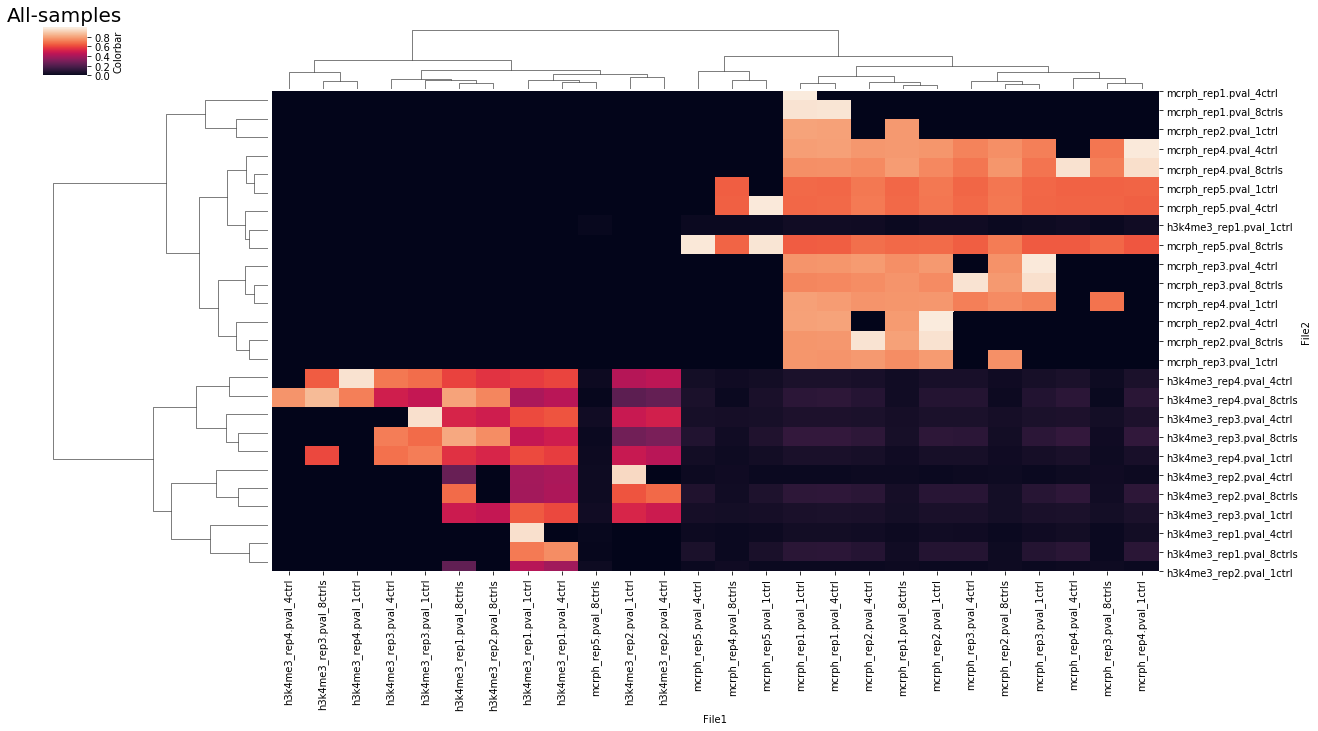

In [16]:
#clustermap

sns.clustermap(result_all_gsm_trans2,
               metric="correlation",
#                cbar_pos=(0.02, 0.8, 0.05, 0.18),
               cbar_kws={'label': 'Colorbar'},
               figsize=(20, 10))

plt.title("All-samples", fontsize =20)



# Getting the new control samples for each target to test

1) Here we selected two controls: one related to h3k4me1 targete and another one related to h3k4me3

2)After, we ran the tests using our traits test samples with each control related above

3)With the BigWig files, we performed the correlations between these files and the original files (traits analyzed with their respective (one) controls.


In [229]:
#Loading the SRR table

gsm_srr = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/SRR_files_script/SRR_GSM_complete_mac.csv')


In [230]:
gsm_srr

,GSM,SRR
0,GSM1372858,SRR1259179
1,GSM2067532,SRR3180014
2,GSM1663049,SRR1983955
3,GSM3593617,SRR8544013
4,GSM2842768,SRR6260739
...,...,...
57157,GSM2828870,SRR6214205
57158,GSM2278008,SRR4029224
57159,GSM1960234,SRR2968704
57160,GSM2421806,SRR5093078


In [242]:
#Looking for one control related to h3k4me3 target
#Getting a GSM from h3k4me3 intersection 

#GSM1018044 - lung adenocarcinoma cells:A549


gsm_srr[(gsm_srr['GSM'].str.contains('GSM1018044', case=False, na=False))]



#GSM1372873 - Human endometrial stromal cells - h3k4me1

gsm_srr[(gsm_srr['GSM'].str.contains('GSM1372873', case=False, na=False))]





,GSM,SRR
33227,GSM1372873,SRR1259191


# Macrophage Random

In [257]:
#Loading files 

mcrp_random = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/macrophage-random-out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])

In [258]:
#replacing string

mcrp_random_1 = replace_substring_bigwig(mcrp_random, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [259]:
mcrp_random_1

,File1,File2,correlation
0,mcrph_rep1.pval_1ctrl,mcrph_rep1.pval_1ctr-rdm,0.952006
1,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_1ctrl,0.810541
2,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_1ctr-rdm,0.751541
3,mcrph_rep1.pval_1ctrl,mcrph_rep3.pval_1ctrl,0.780431
4,mcrph_rep1.pval_1ctrl,mcrph_rep3.pval_1ctr-rdm,0.702758
...,...,...,...
40,mcrph_rep4.pval_1ctrl,mcrph_rep5.pval_1ctrl,0.669112
41,mcrph_rep4.pval_1ctrl,mcrph_rep5.pval_1ctr-rdm,0.605510
42,mcrph_rep4.pval_1ctr-rdm,mcrph_rep5.pval_1ctrl,0.591241
43,mcrph_rep4.pval_1ctr-rdm,mcrph_rep5.pval_1ctr-rdm,0.632055


In [260]:
#pivoted and transposed

result_mcrp_random_1 = mcrp_random_1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_mcrp_random_1_trans = result_mcrp_random_1.T

In [261]:
result_mcrp_random_1_trans

File1,mcrph_rep1.pval_1ctr-rdm,mcrph_rep1.pval_1ctrl,mcrph_rep2.pval_1ctr-rdm,mcrph_rep2.pval_1ctrl,mcrph_rep3.pval_1ctr-rdm,mcrph_rep3.pval_1ctrl,mcrph_rep4.pval_1ctr-rdm,mcrph_rep4.pval_1ctrl,mcrph_rep5.pval_1ctrl
File2,,,,,,,,,
mcrph_rep1.pval_1ctr-rdm,NaN,0.952006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcrph_rep2.pval_1ctr-rdm,0.792069,0.751541,NaN,0.931099,NaN,NaN,NaN,NaN,NaN
mcrph_rep2.pval_1ctrl,0.753441,0.810541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcrph_rep3.pval_1ctr-rdm,0.755245,0.702758,0.762717,0.701654,NaN,0.916577,NaN,NaN,NaN
mcrph_rep3.pval_1ctrl,0.728856,0.780431,0.727665,0.791835,NaN,NaN,NaN,NaN,NaN
mcrph_rep4.pval_1ctr-rdm,0.779530,0.722290,0.758195,0.693197,0.708919,0.653428,NaN,0.913520,NaN
mcrph_rep4.pval_1ctrl,0.752545,0.802726,0.722749,0.783810,0.657171,0.737802,NaN,NaN,NaN
mcrph_rep5.pval_1ctr-rdm,0.650079,0.620774,0.678609,0.643733,0.637128,0.611823,0.632055,0.605510,0.925445
mcrph_rep5.pval_1ctrl,0.633836,0.680794,0.654492,0.714627,0.600367,0.678003,0.591241,0.669112,NaN


In [262]:
#Heatmap

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_mcrp_random_1_trans, annot=True, fmt=".2g", cmap="RdBu", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("Macrophage-Random-1Ctrl", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!

# H3k4me3 Random

In [263]:
#loading 


h3k4me3_random = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/h3k4me3-random-out.txt', sep="\t", header=None, names=['File1','File2', 'correlation'])

In [265]:
#replacing string

h3k4me3_random_1 = replace_substring_bigwig(h3k4me3_random, [(r'^SRR\d+\w+\.\w+\.\w{15}', 'mcrph'), (r'^SRR\d+\w+\.\w{15}', 'h3k4me3'), (r'.signal', ''), (r'.bigwig', '')], columns=['File1', 'File2'])

In [267]:
#pivoted and transposed

result_h3k4me3_random_1 = h3k4me3_random_1.pivot_table(index='File1', columns='File2', values='correlation')

#transposed table


result_h3k4me3_random_1_trans = result_h3k4me3_random_1.T

In [269]:
#Heatmap

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(result_h3k4me3_random_1_trans, annot=True, fmt=".2g", cmap="Spectral", square=True, linewidths=.5, cbar_kws={'label': 'Colorbar'}, annot_kws={'size':10})


#To avoid the cutted squares at the top and bottom is necessary to add a space

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values



plt.title("H3k4me3-Random-1Ctrl", fontsize =20)
plt.xlabel('Replicates', fontsize = 12)
plt.ylabel('Replicates', fontsize = 12)
plt.show() # ta-da!